In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sbs
from sklearn import linear_model
import scipy
from scipy import ndimage

In [44]:
fname='ex1data2.txt';
#dtype = np.dtype([('X', 'f8'), ('y', 'f8')])
df = pd.read_csv(fname,delimiter=',',header=None)
df.shape
data=np.asmatrix(df)
X = data[:, 0:2]; 
y = data[:, 2];
m = np.shape(X);
m

(47L, 2L)

In [27]:
X_train = X[:-20]
#X_train = X
X_test = X[-20:]
y_train = y[:-20]
#y_train = y
y_test = y[-20:]
np.shape(y_test)

(20L, 1L)

In [52]:
#Ordinary Least Squares 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean(np.square((regr.predict(X_test) - y_test))))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


('Coefficients: \n', array([[  143.62075383,  8517.08072987]]), array([ 31679.81439448]))
Mean squared error: 4739542362.77
Variance score: 0.59


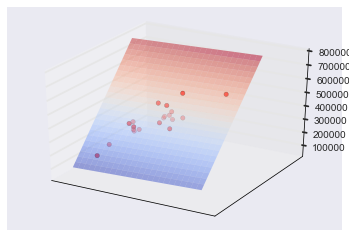

In [53]:
fig = plt.figure()
plt.hold(True)
ax = fig.add_subplot(111, projection='3d')
xx =np.linspace(0,5000,25);
yy =np.linspace(1,5,25);
xx_surf,yy_surf=np.meshgrid(xx,yy);
zz = np.zeros((len(xx),len(yy)));
ax.set_xlim(0, 6000)
ax.set_ylim(0, 6)
ax.set_zlim(30000, 800000)
for i,x_sim in enumerate(xx):
    for j,y_sim in enumerate(yy):
         zz[i,j] = regr.predict([x_sim,y_sim]);
ax.plot_surface(xx_surf, yy_surf, zz, rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=0, antialiased=True,alpha=0.5); 
ax.scatter(X_test[:,0:1], X_test[:,1:2], np.array(y_test), c='r', marker='o')
plt.xticks(())
plt.yticks(())
plt.show()

In [55]:
#Ridge Regression
n_alphas = 20
alphas = np.logspace(-100, -10, n_alphas)
clf = linear_model.Ridge(fit_intercept=True)

coefs = []
intercepts=[]
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    intercepts.append(clf.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean(np.square((regr.predict(X_test) - y_test))))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
    


('Coefficients: \n', array([[  143.62075383,  8517.08072987]]), array([ 31679.81439448]))
Mean squared error: 4739542362.77
Variance score: 0.59


In [56]:
[intercepts[5],coefs[5]]

[array([ 89597.9095428]), array([[  139.21067402, -8738.01911233]])]

In [7]:
np.shape(X)

(47L, 1L)